

Componente 1: Data Fetching


In [ ]:
!pip install config
!pip install tweepy

In [ ]:
from config import *
import tweepy
import datetime
import pandas as pd

In [ ]:
TWITTER_CONSUMER_KEY = 'e27sd02R39EIsSHfrTUCiOwXT'
TWITTER_CONSUMER_SECRET = 'X0K7qJC7lZ9An1NXWJ3yYijOp4tAFPWcd3OjcBP15djPe9m5KZ'
TWITTER_ACCESS_TOKEN = '175984347-MCv5cbRKRBxXOFKDUfsQVtGhuPy42aRDn53UWP4L'
TWITTER_ACCESS_TOKEN_SECRET = 'XMEe25XGwoeozruLf9Y1zK5wYlTup9U0xLHLG4BT3JffE'

In [ ]:
auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
today = datetime.date.today()
yesterday= today - datetime.timedelta(days=1)

In [ ]:
tweets_list = tweepy.Cursor(api.search, q="#paraguay since:" + str(yesterday)+ " until:" + str(today),tweet_mode='extended', lang='es').items()

In [ ]:
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    print(text)
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    
    line = {'text' : text, 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at}
    output.append(line)

In [ ]:
df = pd.DataFrame(output)
df.to_csv('output.csv')

In [ ]:
df

Componente 2: Data Analysis

In [ ]:
!pip install config
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from config import *
import tweepy
import datetime
import pandas as pd

In [ ]:
TWITTER_CONSUMER_KEY = 'e27sd02R39EIsSHfrTUCiOwXT'
TWITTER_CONSUMER_SECRET = 'X0K7qJC7lZ9An1NXWJ3yYijOp4tAFPWcd3OjcBP15djPe9m5KZ'
TWITTER_ACCESS_TOKEN = '175984347-MCv5cbRKRBxXOFKDUfsQVtGhuPy42aRDn53UWP4L'
TWITTER_ACCESS_TOKEN_SECRET = 'XMEe25XGwoeozruLf9Y1zK5wYlTup9U0xLHLG4BT3JffE'

In [ ]:
auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
today = datetime.date.today()
yesterday= today - datetime.timedelta(days=1)

In [ ]:
tweets_list = tweepy.Cursor(api.search, q="#olimpia since:" + str(yesterday)+ " until:" + str(today),tweet_mode='extended', lang='en').items()

In [ ]:
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    print(text)
    
    line = {'text' : text}
    output.append(line)

In [ ]:
data = pd.DataFrame(output)
data.head()

,text
0,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...
1,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...
2,RT @acantero88: Traiganme a Goianiense!! #Olim...
3,Traiganme a Goianiense!! #Olimpia https://t.co...
4,🕒 38' ST \n\n⚽️ #Olimpia 4 🆚️ 1 #Resistencia \...


In [ ]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
data['Cleaned Tweets'] = data['text'].apply(clean)
data.head()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
On my way!ort nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
On my way!ort nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
On my way!ort nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download()
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('spanish')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['POS tagged'] = data['Cleaned Tweets'].apply(token_stop_pos)
data.head()

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
data['Lemma'] = data['POS tagged'].apply(lemmatize)
data.head()

,text,Cleaned Tweets,POS tagged,Lemma
0,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...,RT MickyJnr Emmanuel Sheyi Adebayor won his tr...,"[(RT, n), (MickyJnr, n), (Emmanuel, n), (Sheyi...",RT MickyJnr Emmanuel Sheyi Adebayor win his ...
1,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...,RT MickyJnr Emmanuel Sheyi Adebayor won his tr...,"[(RT, n), (MickyJnr, n), (Emmanuel, n), (Sheyi...",RT MickyJnr Emmanuel Sheyi Adebayor win his ...
2,RT @acantero88: Traiganme a Goianiense!! #Olim...,RT acantero Traiganme a Goianiense Olimpia htt...,"[(RT, n), (acantero, n), (Traiganme, n), (Goia...",RT acantero Traiganme Goianiense Olimpia htt...
3,Traiganme a Goianiense!! #Olimpia https://t.co...,Traiganme a Goianiense Olimpia https t co GrIL...,"[(Traiganme, v), (Goianiense, n), (Olimpia, n)...",Traiganme Goianiense Olimpia http t co GrIL ...
4,🕒 38' ST \n\n⚽️ #Olimpia 4 🆚️ 1 #Resistencia \...,ST Olimpia Resistencia Apertura Fecha Deporte...,"[(ST, n), (Olimpia, n), (Resistencia, n), (Ape...",ST Olimpia Resistencia Apertura Fecha Deport...


In [ ]:
data[['text', 'Lemma']]

,text,Lemma
0,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...,RT MickyJnr Emmanuel Sheyi Adebayor win his ...
1,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...,RT MickyJnr Emmanuel Sheyi Adebayor win his ...
2,RT @acantero88: Traiganme a Goianiense!! #Olim...,RT acantero Traiganme Goianiense Olimpia htt...
3,Traiganme a Goianiense!! #Olimpia https://t.co...,Traiganme Goianiense Olimpia http t co GrIL ...
4,🕒 38' ST \n\n⚽️ #Olimpia 4 🆚️ 1 #Resistencia \...,ST Olimpia Resistencia Apertura Fecha Deport...
5,🕒 15' ST \n\n⚽️ #Olimpia 2 🆚️ 1 #Resistencia \...,ST Olimpia Resistencia Apertura Fecha Deport...
6,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...,RT MickyJnr Emmanuel Sheyi Adebayor win his ...
7,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...,RT MickyJnr Emmanuel Sheyi Adebayor win his ...
8,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...,RT MickyJnr Emmanuel Sheyi Adebayor win his ...
9,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...,RT MickyJnr Emmanuel Sheyi Adebayor win his ...


In [ ]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
fin_data = pd.DataFrame(data[['text', 'Lemma']])

In [ ]:
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,text,Lemma,Polarity,Analysis
0,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...,RT MickyJnr Emmanuel Sheyi Adebayor win his ...,0.15,Positive
1,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...,RT MickyJnr Emmanuel Sheyi Adebayor win his ...,0.15,Positive
2,RT @acantero88: Traiganme a Goianiense!! #Olim...,RT acantero Traiganme Goianiense Olimpia htt...,0.00,Neutral
3,Traiganme a Goianiense!! #Olimpia https://t.co...,Traiganme Goianiense Olimpia http t co GrIL ...,0.00,Neutral
4,🕒 38' ST \n\n⚽️ #Olimpia 4 🆚️ 1 #Resistencia \...,ST Olimpia Resistencia Apertura Fecha Deport...,0.00,Neutral


In [ ]:
fin_data.describe()

,Polarity
count,21.000000
mean,0.169048
std,0.205837
min,0.000000
25%,0.000000
50%,0.150000
75%,0.200000
max,0.800000


In [ ]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    14
Neutral      7
Name: Analysis, dtype: int64

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [ ]:
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...,RT MickyJnr Emmanuel Sheyi Adebayor win his ...,0.15,Positive,0.1779,Neutral
1,RT @MickyJnr__: Emmanuel Sheyi Adebayor (38) w...,RT MickyJnr Emmanuel Sheyi Adebayor win his ...,0.15,Positive,0.1779,Neutral
2,RT @acantero88: Traiganme a Goianiense!! #Olim...,RT acantero Traiganme Goianiense Olimpia htt...,0.00,Neutral,0.0000,Neutral
3,Traiganme a Goianiense!! #Olimpia https://t.co...,Traiganme Goianiense Olimpia http t co GrIL ...,0.00,Neutral,0.0000,Neutral
4,🕒 38' ST \n\n⚽️ #Olimpia 4 🆚️ 1 #Resistencia \...,ST Olimpia Resistencia Apertura Fecha Deport...,0.00,Neutral,0.0000,Neutral


In [ ]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Neutral     16
Positive     5
Name: Vader Analysis, dtype: int64

In [ ]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

fin_data['SWN analysis'] = data['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

In [ ]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Negative    10
Positive     6
Neutral      5
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fa5f9b4b850>,
 [Text(0.08967610696856887, 1.19664455701723, 'Negative'),
  Text(-0.8063570223196342, -0.7481900510938467, 'Positive'),
  Text(0.8063571273955387, -0.7481899378489497, 'Neutral')],
 [Text(0.05231106239833183, 0.6980426582600506, '47.6%'),
  Text(-0.4398311030834368, -0.4081036642330073, '28.6%'),
  Text(0.4398311603975665, -0.4081036024630635, '23.8%')])

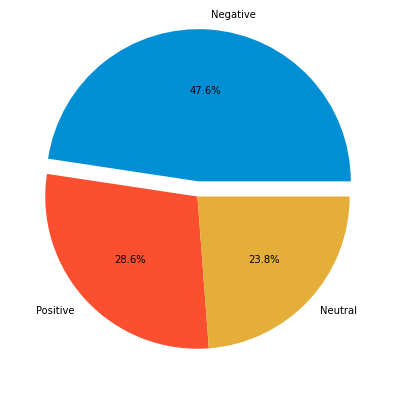

In [ ]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)